In [ ]:
import requests
import pandas as pd

# Ask user for GitHub username
username = "dynamic010"

# API URLs
user_url = f"https://api.github.com/users/{username}"
repos_url = f"https://api.github.com/users/{username}/repos"

# Get user profile data
user_data = requests.get(user_url).json()
repos_data = requests.get(repos_url).json()

# Basic profile info
profile = {
    "Username": user_data.get("login"),
    "Name": user_data.get("name"),
    "Bio": user_data.get("bio"),
    "Public Repos": user_data.get("public_repos"),
    "Followers": user_data.get("followers"),
    "Following": user_data.get("following")
}

print("Profile Summary:\n")
for k,v in profile.items():
    print(f"{k}: {v}")

# Create a DataFrame of repositories
repo_list = []
for repo in repos_data:
    repo_list.append([repo["name"], repo["stargazers_count"], repo["language"]])

df = pd.DataFrame(repo_list, columns=["Repository", "Stars", "Language"])
print("\nRepositories:\n")
print(df)

# Language usage summary
lang_summary = df["Language"].value_counts()
print("\nLanguage Usage:\n")
print(lang_summary)


Enter GitHub username: torvalds
Profile Summary:

Username: torvalds
Name: Linus Torvalds
Bio: None
Public Repos: 9
Followers: 254941
Following: 0

Repositories:

            Repository   Stars  Language
0                1590A     437  OpenSCAD
1          GuitarPedal    1156  OpenSCAD
2       libdc-for-dirk     283         C
3              libgit2     230         C
4                linux  206670         C
5           pesconvert     455         C
6  subsurface-for-dirk     346       C++
7             test-tlb     831         C
8               uemacs    1632         C

Language Usage:

Language
C           6
OpenSCAD    2
C++         1
Name: count, dtype: int64


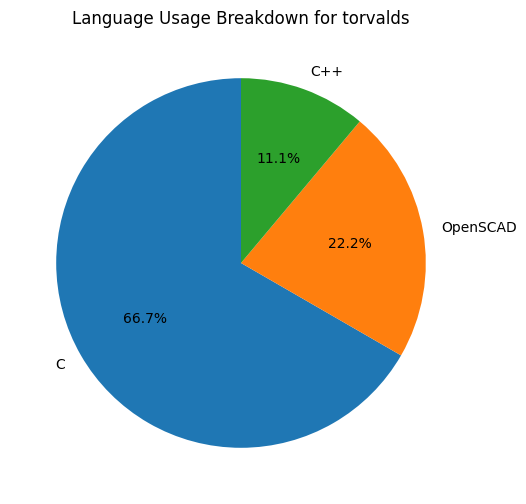

In [ ]:
import matplotlib.pyplot as plt

lang_summary = df["Language"].value_counts()

plt.figure(figsize=(6,6))
lang_summary.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title(f"Language Usage Breakdown for {username}")
plt.ylabel("")  # removes text label
plt.show()


In [ ]:
top_repos = df.sort_values(by="Stars", ascending=False).head(10)
print("\n🔥 Top Starred Repositories:\n")
print(top_repos)



🔥 Top Starred Repositories:

            Repository   Stars  Language
4                linux  206670         C
8               uemacs    1632         C
1          GuitarPedal    1156  OpenSCAD
7             test-tlb     831         C
5           pesconvert     455         C
0                1590A     437  OpenSCAD
6  subsurface-for-dirk     346       C++
2       libdc-for-dirk     283         C
3              libgit2     230         C


In [ ]:
summary = f"""
GitHub Developer Profile Report

Username: {profile['Username']}
Name: {profile['Name']}
Followers: {profile['Followers']}
Public Repos: {profile['Public Repos']}

Top Skills (Based on Repo Languages):
{lang_summary.to_string()}

Top Starred Projects:
{top_repos.to_string(index=False)}
"""

print(summary)



GitHub Developer Profile Report

Username: torvalds
Name: Linus Torvalds
Followers: 254941
Public Repos: 9

Top Skills (Based on Repo Languages):
Language
C           6
OpenSCAD    2
C++         1

Top Starred Projects:
         Repository  Stars Language
              linux 206670        C
             uemacs   1632        C
        GuitarPedal   1156 OpenSCAD
           test-tlb    831        C
         pesconvert    455        C
              1590A    437 OpenSCAD
subsurface-for-dirk    346      C++
     libdc-for-dirk    283        C
            libgit2    230        C



In [ ]:
with open("github_profile_report.txt", "w") as f:
    f.write(summary)

print("✅ Report saved as: github_profile_report.txt")


✅ Report saved as: github_profile_report.txt
